#### Gene Expression Analysis for the GSE164522 Dataset - for single tissue
The following notebook includes analysis for the GSE164522 gene expression tissue data for a single tissue, as well as some code for subsetting data by specific barcodes. 
It utilizes general analysis techniques in addition to scanpy.

#### Set Environment

In [ ]:
import pandas as pd
import scanpy as sc
from anndata import AnnData
import collections

#### Load Data

##### Expression Data

In [ ]:
MN_expression = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_CRLM_MN_expression.csv")
# make the Unamed:0 column the index
MN_expression.set_index('Unnamed: 0', inplace=True)
MN_expression

,AAACCTGCAGTCTTCC.4,AAACCTGGTAAACGCG.4,AAACCTGGTCGCTTCT.4,AAACCTGTCGCCAAAT.4,AAACCTGTCGTGGTCG.4,AAACGGGAGGACCACA.4,AAACGGGCAATGAATG.4,AAACGGGGTACTTAGC.4,AAACGGGGTGCTAGCC.4,AAACGGGGTTCGAATC.4,...,TTTGGTTTCTGCGGCA.57,TTTGTCACAAGCCCAC.57,TTTGTCACACATGGGA.57,TTTGTCACACGACGAA.57,TTTGTCACAGCCAGAA.57,TTTGTCAGTGAAAGAG.57,TTTGTCAGTTCCCTTG.57,TTTGTCATCCCATTTA.57,TTTGTCATCTATCCTA.57,TTTGTCATCTTTACAC.57
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
RP11-34P13.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
FO538757.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
FO538757.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.320121,0.0,1.897484,0.0,0.0,1.452786,0.0,0.0,0.0
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
AC004556.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
AC233755.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


##### TCR Data

In [ ]:
vdj_cd8 = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/vdj_cd8_full.csv")
vdj_cd4 = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/vdj_cd4_full.csv")
vdj_cd8_cd4 = pd.concat([vdj_cd8, vdj_cd4], axis=0)
vdj_cd8_cd4

,Unnamed: 0,identifier_final,vdj_barcode,X.1,X,barcode,is_cell_a,contig_id_a,high_confidence_a,length_a,...,sample,patient,tissue,ID,celltype_global,celltype_major,celltype_sub,n.y,clonal_id_final,clonal_id_id
0,1,TRAV1-1-TGCGACCTGCGAACACCTCTTGTCTTT-TRAJ29-TRB...,patient15_lymph node_CAACTAGGTCCGACGT,54196,1,CAACTAGGTCCGACGT-1,True,CAACTAGGTCCGACGT-1_contig_4,True,563,...,lymph node,patient15,lymph node,44,Lymphoid-T-NK,CD8 T,hC02_CD8_Tcm-GPR183,1,clone1,P15:clone1:1
1,2,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis normal_AGTTGGTTCAGTTGAC,20121,3,AGTTGGTTCAGTTGAC-1,True,AGTTGGTTCAGTTGAC-1_contig_2,True,522,...,metastasis normal,patient12,metastasis normal,28,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
2,3,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis normal_CATGACACAAGGGTCA,20119,1,CATGACACAAGGGTCA-1,True,CATGACACAAGGGTCA-1_contig_2,True,586,...,metastasis normal,patient12,metastasis normal,28,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
3,4,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis tumor_GACTAACGTAGCTTGT,20120,2,GACTAACGTAGCTTGT-1,True,GACTAACGTAGCTTGT-1_contig_2,True,553,...,metastasis tumor,patient12,metastasis tumor,29,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
4,5,TRAV1-1-TGCGCCCAAGGAGACGACTACAAGCTCAGCTTT-TRAJ...,patient12_metastasis tumor_AACTTTCCAAGCCGTC,20123,5,AACTTTCCAAGCCGTC-1,True,AACTTTCCAAGCCGTC-1_contig_4,True,516,...,metastasis tumor,patient12,metastasis tumor,29,Lymphoid-T-NK,CD8 T,hC06_CD8_Tem-CXCR5,1,clone3,P12:clone3:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44099,44100,TRAV9-2-TGTGTCAAAGGCGGGCCAGGAGGAGGTGCTGACGGACT...,patient16_metastasis normal_GATGCTAAGCCGCCTA,70958,8255,GATGCTAAGCCGCCTA-1,True,GATGCTAAGCCGCCTA-1_contig_2,True,471,...,metastasis normal,patient16,metastasis normal,51,Lymphoid-T-NK,CD4 T,hC16_CD4_Tcm-ANXA1,1,clone36148,P16:clone36148:1
44100,44101,TRAV9-2-TGTGTGATCCGGGATAGCAGCTATAAATTGATCTTC-T...,patient16_metastasis normal_CACACCTGTTCCACTC,70959,8256,CACACCTGTTCCACTC-1,True,CACACCTGTTCCACTC-1_contig_3,True,489,...,metastasis normal,patient16,metastasis normal,51,Lymphoid-T-NK,CD4 T,hC24_CD4_Th1-CXCL13,1,clone36149,P16:clone36149:1
44101,44102,TRAV9-2-TGTGTTATGGGAGGTAGCAACTATAAACTGACATTT-T...,patient17_lymph node_AGGGATGGTTTGCATG,82649,11690,AGGGATGGTTTGCATG-1,True,AGGGATGGTTTGCATG-1_contig_3,True,489,...,lymph node,patient17,lymph node,56,Lymphoid-T-NK,CD4 T,hC25_CD4_Treg-FOXP3,1,clone36150,P17:clone36150:1
44102,44103,TRAV9-2-TGTTCCCGGGGGAGCAACACAGGCAAACTAATCTTT-T...,patient13_PBMC_CCTAAAGGTCTAGCGC,44319,10992,CCTAAAGGTCTAGCGC-1,True,CCTAAAGGTCTAGCGC-1_contig_2,True,517,...,PBMC,patient13,PBMC,37,Lymphoid-T-NK,CD4 T,hC16_CD4_Tcm-ANXA1,1,clone36151,P13:clone36151:1


#### Prepare data for joining

In [ ]:
sample_type = 'metastasis normal'
sample_type_short = 'MN'
GE_matrix = MN_expression

In [ ]:
# extract VDJ barcodes
vdj_cd8_cd4_subset = vdj_cd8_cd4[vdj_cd8_cd4['sample']==sample_type]
vdj_cd8_cd4_subset_barcode = vdj_cd8_cd4_subset['barcode']
# split the barcodes by - and take the first element
vdj_cd8_cd4_subset_barcode = vdj_cd8_cd4_subset_barcode.str.split('-', expand=True)[0]
# make it a list
vdj_cd8_cd4_subset_barcode_list = vdj_cd8_cd4_subset_barcode.tolist()

In [ ]:
# extract gene expression barcodes
# Convert Index to Series first
tissue_GE_barcode = pd.Series(GE_matrix.columns)

# Split the barcodes by '.' and take the first element of each split
tissue_GE_barcode = tissue_GE_barcode.str.split('.').str[0]

# Convert the Series to a list
tissue_GE_barcode_list = tissue_GE_barcode.tolist()

In [ ]:
# create overlap list (sequences) between the two datasets
overlap = set(vdj_cd8_cd4_subset_barcode_list) & set(tissue_GE_barcode_list)
overlap_list = list(overlap)
print("The length of vdj_barcode_list is: ")
print(len(vdj_cd8_cd4_subset_barcode_list))
print("The length of GE_barcode_list is: ")
print(len(tissue_GE_barcode_list))
print("The length of the overlap is: ")
print(len(overlap))

The length of vdj_barcode_list is: 
11610
The length of GE_barcode_list is: 
58664
The length of the overlap is: 
11534


Subset Gene Expression Data

In [ ]:
# Split column names at the period and keep the first part
cleaned_GE_column_names = [name.split('.')[0] for name in GE_matrix.columns]
tissue_expression_trimmed = GE_matrix.copy()
# Update the DataFrame's column names
tissue_expression_trimmed.columns = cleaned_GE_column_names
tissue_expression_trimmed_subset = tissue_expression_trimmed[overlap_list]
tissue_expression_trimmed_subset

,GGATTACAGACAAGCC,CTGCGGAGTTCGTTGA,CTGATAGTCCACTCCA,CAGAATCCACGGATAG,TTAGGACTCACGACTA,GTACTTTTCTTCTGGC,ACTGATGGTTCCGTCT,TCTTCGGAGCTGCCCA,CATCCACTCAGTCCCT,TGCTACCAGAGTTGGC,...,CTCGGAGTCTGGCGAC,CTCTGGTGTCGCGGTT,GTAGTCAGTAAACCTC,GTTCGGGAGACTAGGC,GGACGTCCACGGTTTA,TATCAGGCACGAGGTA,TGACTAGAGTCGTACT,CAGAGAGGTTTAGGAA,AAGGAGCCAGCTTAAC,ACGCCGAAGGGAGTAA
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
RP11-34P13.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
FO538757.3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
FO538757.2,0.0,0.0,0.0,0.0,0.0,0.0,1.92476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.070759,1.776673,0.0,0.0
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
AC004556.1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
AC233755.2,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


Subset TCR Data

In [ ]:
# Step 1: Modify the barcode column by splitting and keeping the first part
vdj_cd8_cd4_subset['barcode'] = vdj_cd8_cd4_subset['barcode'].str.split('-', expand=True)[0]

# Step 2: Filter the DataFrame to include only rows where the modified barcodes are in overlap_list
vdj_cd8_cd4_MN_filtered = vdj_cd8_cd4_subset[vdj_cd8_cd4_subset['barcode'].isin(overlap_list)]
vdj_cd8_cd4_MN_filtered


/tmp/ipykernel_592731/2244788205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdj_cd8_cd4_subset['barcode'] = vdj_cd8_cd4_subset['barcode'].str.split('-', expand=True)[0]


,Unnamed: 0,identifier_final,vdj_barcode,X.1,X,barcode,is_cell_a,contig_id_a,high_confidence_a,length_a,...,sample,patient,tissue,ID,celltype_global,celltype_major,celltype_sub,n.y,clonal_id_final,clonal_id_id
1,2,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis normal_AGTTGGTTCAGTTGAC,20121,3,AGTTGGTTCAGTTGAC,True,AGTTGGTTCAGTTGAC-1_contig_2,True,522,...,metastasis normal,patient12,metastasis normal,28,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
2,3,TRAV1-1-TGCGATGGAGGGTACAGCAGTGCTTCCAAGATAATCTT...,patient12_metastasis normal_CATGACACAAGGGTCA,20119,1,CATGACACAAGGGTCA,True,CATGACACAAGGGTCA-1_contig_2,True,586,...,metastasis normal,patient12,metastasis normal,28,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,3,clone2,P12:clone2:3
6,7,TRAV1-1-TGCGCCCCCCAGCACACAGGCTTTCAGAAACTTGTATT...,patient17_metastasis normal_GGACAAGCATTACCTT,70961,2,GGACAAGCATTACCTT,True,GGACAAGCATTACCTT-1_contig_2,True,490,...,metastasis normal,patient17,metastasis normal,57,Lymphoid-T-NK,CD8 T,hC06_CD8_Tem-CXCR5,1,clone5,P17:clone5:1
15,16,TRAV1-1-TGCGCTCCGCTCTACAGCAGTGCTTCCAAGATAATCTT...,patient17_metastasis normal_CTAGAGTCACCTGGTG,70974,15,CTAGAGTCACCTGGTG,True,CTAGAGTCACCTGGTG-1_contig_2,True,490,...,metastasis normal,patient17,metastasis normal,57,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,1,clone14,P17:clone14:1
17,18,TRAV1-1-TGCGCTGCCACTAGCAACACAGGCAAACTAATCTTT-T...,patient14_metastasis normal_GAAATGAGTCATCGGC,44329,10,GAAATGAGTCATCGGC,True,GAAATGAGTCATCGGC-1_contig_3,True,710,...,metastasis normal,patient14,metastasis normal,40,Lymphoid-T-NK,CD8 T,hC14_CD8_MAIT-SLC4A10,1,clone16,P14:clone16:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44049,44050,TRAV9-2-TGTGCTCTTTTCAACCAGGCAGGAACTGCTCTGATCTT...,patient11_metastasis normal_TTGCGTCCACCGAATT,20110,4781,TTGCGTCCACCGAATT,True,TTGCGTCCACCGAATT-1_contig_1,True,495,...,metastasis normal,patient11,metastasis normal,21,Lymphoid-T-NK,CD4 T,hC22_CD4_Trm-CXCR6,1,clone36099,P11:clone36099:1
44055,44056,TRAV9-2-TGTGCTCTTTTTTATAACCAGGGAGGAAAGCTTATCTT...,patient16_metastasis normal_TTGACTTGTCACACGC,70951,8248,TTGACTTGTCACACGC,True,TTGACTTGTCACACGC-1_contig_2,True,492,...,metastasis normal,patient16,metastasis normal,51,Lymphoid-T-NK,CD4 T,hC22_CD4_Trm-CXCR6,1,clone36105,P16:clone36105:1
44094,44095,TRAV9-2-TGTGCTTTTTCTTCTGGTTCTGCAAGGCAACTGACCTT...,patient16_metastasis normal_TGAGAGGGTGAACCTT,70957,8254,TGAGAGGGTGAACCTT,True,TGAGAGGGTGAACCTT-1_contig_2,True,492,...,metastasis normal,patient16,metastasis normal,51,Lymphoid-T-NK,CD4 T,hC24_CD4_Th1-CXCL13,1,clone36144,P16:clone36144:1
44099,44100,TRAV9-2-TGTGTCAAAGGCGGGCCAGGAGGAGGTGCTGACGGACT...,patient16_metastasis normal_GATGCTAAGCCGCCTA,70958,8255,GATGCTAAGCCGCCTA,True,GATGCTAAGCCGCCTA-1_contig_2,True,471,...,metastasis normal,patient16,metastasis normal,51,Lymphoid-T-NK,CD4 T,hC16_CD4_Tcm-ANXA1,1,clone36148,P16:clone36148:1


Merge

In [ ]:
# Merge
# Transpose the gene expression dataframe
tissue_expression_trimmed_subset_transposed = tissue_expression_trimmed_subset.transpose()
tissue_expression_trimmed_subset_transposed.reset_index(inplace=True)
tissue_expression_trimmed_subset_transposed.rename(columns={'index': 'barcode'}, inplace=True)

# Select desired columns from the TCR information dataframe
vdj_columns_needed = ['barcode', 'patient', 'celltype_major', 'celltype_sub', 'cdr3_a', 'cdr3_b']
vdj_cd8_cd4_tissue_selected = vdj_cd8_cd4_MN_filtered[vdj_columns_needed]

# Merge the two dataframes on the barcode column
merged_df = pd.merge(tissue_expression_trimmed_subset_transposed, vdj_cd8_cd4_tissue_selected, on='barcode', how='inner')
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['barcode'])

#### Subset Data with specific sequences
If desired, the data can be subseted with a specific sequence list, for example, the top 9 public MAIT sequences we investigated in our analysis.

In [ ]:
# add top_MN_MAIT column
MN_MAIT_public_top9_sequences = ['CAVVDSNYQLIW', 'CAVTDSNYQLIW', 'CAAMDSNYQLIW', 'CAVMDSNYQLIW','CAVSDSNYQLIW', 'CAVMDSSYKLIF', 'CAVLDSNYQLIW', 'CAVKDSNYQLIW', 'CAVRDSNYQLIW']
# Zhang_GSE164522_common_sequences = pd.read_csv("~/CRC_Project/single_cell_data/zhang_gse164522_sc_paired_cdr3_sequences.csv")

COL_NAME = 'Common_sequences'#'Zhang_GSE164522_Common' # top_MN_MAIT
SEQUENCES_TO_SUBSET = MN_MAIT_public_top9_sequences

In [ ]:
# Check if either cdr3_a or cdr3_b is in the list of top sequences
merged_df_no_duplicates[COL_NAME] = merged_df_no_duplicates.apply(
    lambda row: row['cdr3_a'] in SEQUENCES_TO_SUBSET or row['cdr3_b'] in SEQUENCES_TO_SUBSET,
    axis=1
)
merged_df_no_duplicates

/tmp/ipykernel_592731/2585126430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_no_duplicates[COL_NAME] = merged_df_no_duplicates.apply(


,barcode,RP11-34P13.7,RP11-34P13.14,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,FAM87B,...,AC004556.1,AC233755.2,AC233755.1,AC240274.1,patient,celltype_major,celltype_sub,cdr3_a,cdr3_b,Common_sequences
0,GGATTACAGACAAGCC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient16,CD4 T,hC19_CD4_Tn-TCF7,CIVFRNNNARLMF,CASTPAHVTGELFF,False
1,CTGCGGAGTTCGTTGA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient10,CD8 T,hC10_CD8_Trm-KLRB1,CAAFKPLNSGGSNYKLTF,CAISAGQGVLYEQYV,False
2,CTGATAGTCCACTCCA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient10,CD8 T,hC10_CD8_Trm-KLRB1,CATDEWGAQKLVF,CASSTRTSTNNEQFF,False
3,CAGAATCCACGGATAG,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient10,CD8 T,hC05_CD8_Tem-GZMK,CAVKDSNYQLIW,CSVQRLAGDYNEQFF,True
4,TTAGGACTCACGACTA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient10,CD4 T,hC21_CD4_Tem-GZMK,CALYNSGGSNYKLTF,CASSLESGLYNEQFF,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12410,TATCAGGCACGAGGTA,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient12,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CASSEVAGDQETQYF,True
12411,TGACTAGAGTCGTACT,0.0,0.0,0.0,2.070759,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient14,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVIDSSYKLIF,CASSESGGTDTQYF,False
12412,CAGAGAGGTTTAGGAA,0.0,0.0,0.0,1.776673,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient13,CD4 T,hC21_CD4_Tem-GZMK,CVVIDNGQNFVF,CASSISTGGYSPLHF,False
12413,AAGGAGCCAGCTTAAC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient12,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSNYQLIW,CSARVGQVQETQYF,True


In [ ]:
collections.Counter(merged_df_no_duplicates[COL_NAME])

Counter({False: 9573, True: 1961})

In [ ]:
# Create a new column for categorical conversion
merged_df_no_duplicates_cp = merged_df_no_duplicates.copy()

NEW_COL_NAME = COL_NAME + '_new'
# Perform the conversion to categorical without warnings
merged_df_no_duplicates_cp[NEW_COL_NAME] = pd.Categorical(merged_df_no_duplicates[COL_NAME].astype(int), categories=[0, 1])

# Check the new column's data type and categories
print("Data type:", merged_df_no_duplicates_cp[NEW_COL_NAME].dtype)
print("Categories:", merged_df_no_duplicates_cp[NEW_COL_NAME].cat.categories)


Data type: category
Categories: Index([0, 1], dtype='int64')


#### Gene Expression Analysis Using Scanpy

In [ ]:
# Drop non-gene expression columns from the main data matrix
gene_expression_data = merged_df_no_duplicates_cp.drop(columns=['barcode', 'patient', 'celltype_major', 'celltype_sub', 'cdr3_a', 'cdr3_b', COL_NAME, NEW_COL_NAME])

# Create AnnData object
adata = AnnData(gene_expression_data)

# Add metadata
# adata.obs['top_MN_MAIT'] = merged_df_no_duplicates['top_MN_MAIT'].astype('category')
adata.obs = merged_df_no_duplicates_cp[[NEW_COL_NAME]]

# Verify the structure
print(adata)

AnnData object with n_obs × n_vars = 11534 × 24662
    obs: 'Common_sequences_new'


/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [ ]:
# Preliminary filtering
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=3)

# Normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

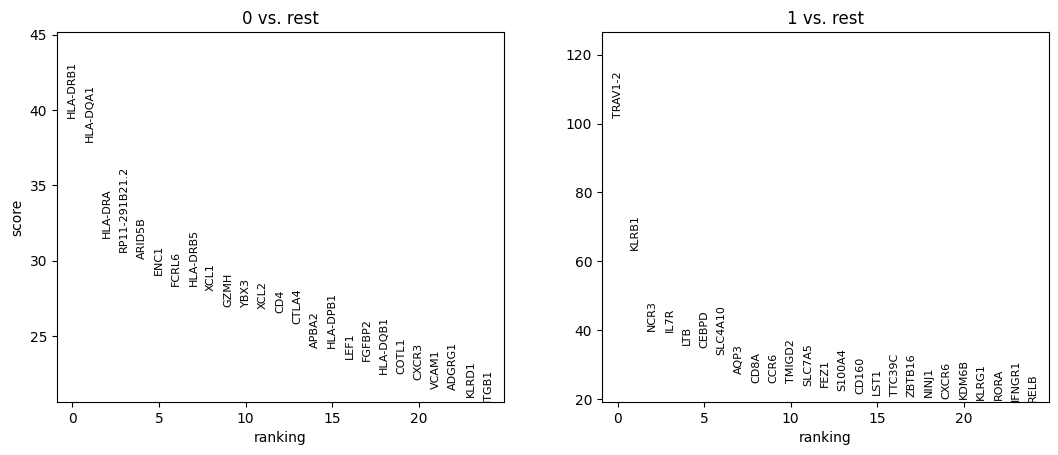

In [ ]:
# Perform the differential expression
sc.tl.rank_genes_groups(adata, NEW_COL_NAME, method='t-test')

# Plot the top differentially expressed genes
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save='top_MN_gene_expression_ranking.png')

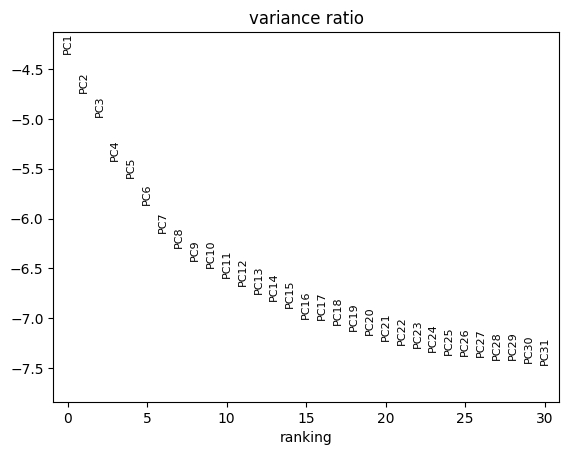

In [ ]:
# PCA
sc.tl.pca(adata, svd_solver='arpack')

# Plot PCA
sc.pl.pca_variance_ratio(adata, log=True)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


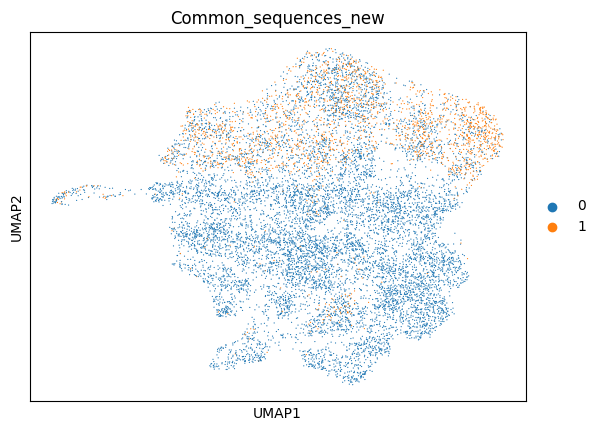

In [ ]:
# Clustering
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=11)
sc.tl.umap(adata)
# sc.pl.umap(adata, color=['leiden', 'top_MN_MAIT'], wspace=0.5, size=3)
sc.pl.umap(adata, color=[NEW_COL_NAME], wspace=0.5, size=3, save='MN_MAIT_Gene_expression_umap.png')

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


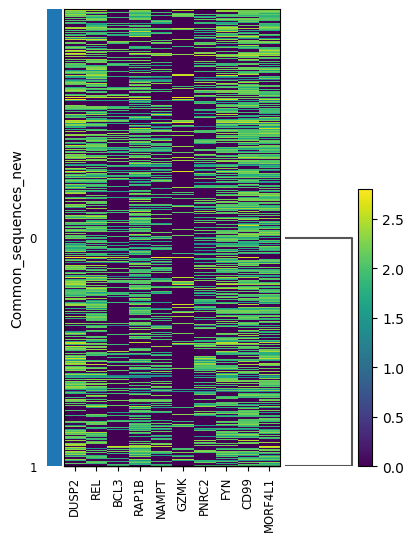

In [ ]:
sc.tl.rank_genes_groups(adata, NEW_COL_NAME, method='t-test')

# Assuming you want to look at the top 10 marker genes
top_genes_1 = sc.get.rank_genes_groups_df(adata, group='1')  # Adjust the group as needed
top_genes_1 = top_genes_1.sort_values('scores', ascending=False).head(10)['names']

sc.pl.heatmap(adata, var_names=top_genes_1, groupby=NEW_COL_NAME, cmap='viridis', dendrogram=True)

/home/ubuntu/miniconda3/envs/CRC_Project_env/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


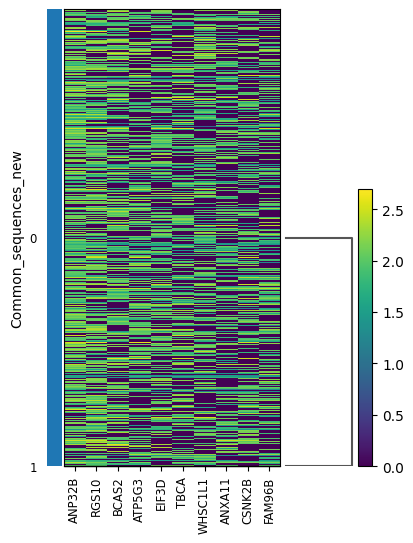

In [ ]:
# Assuming you want to look at the top 10 marker genes
top_genes_0 = sc.get.rank_genes_groups_df(adata, group='0')  # Adjust the group as needed
top_genes_0 = top_genes_0.sort_values('scores', ascending=False).head(10)['names']

sc.pl.heatmap(adata, var_names=top_genes_0, groupby=NEW_COL_NAME, cmap='viridis', dendrogram=True)

#### Subset Metadata file by tissue

In [171]:
metadata = pd.read_csv("~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_CRLM_metadata.csv")
metadata_sampled_tissue = metadata[metadata['tissue'] == sample_type]
metadata_sampled_tissue

,Unnamed: 0,n_genes,percent_mito,n_counts,louvain,sample,patient,tissue,ID,celltype_global,celltype_major,celltype_sub
11308,AAACCTGAGCCACGCT-6,1474,0.027882,2220.8560,2,lymph node,patient09,lymph node,6,Lymphoid-T-NK,NK cell,CD3D-CD4+
11309,AAACCTGAGCTAGTCT-6,2149,0.084147,2963.4382,22,lymph node,patient09,lymph node,6,CD45-,CD45-,CD45-
11310,AAACCTGCAATCTACG-6,1469,0.054073,2296.6794,0,lymph node,patient09,lymph node,6,Lymphoid-B,Bcell,hC70_B-GPR183
11311,AAACCTGCACCAGATT-6,3092,0.025050,2770.8460,2,lymph node,patient09,lymph node,6,Lymphoid-T-NK,CD4 T,hC19_CD4_Tn-TCF7
11312,AAACCTGCAGTCCTTC-6,906,0.109548,1389.7863,19,lymph node,patient09,lymph node,6,Lymphoid-B,Bcell,hC77_plasmaB-IGHA1|IGLC2
...,...,...,...,...,...,...,...,...,...,...,...,...
235447,TTTGTCATCCACGCAG-56,1366,0.027639,2364.3313,12,lymph node,patient17,lymph node,56,Lymphoid-T-NK,NK cell,CD3D-CD4+
235448,TTTGTCATCGCCAAAT-56,1446,0.048900,2295.9497,1,lymph node,patient17,lymph node,56,Lymphoid-T-NK,CD4 T,hC22_CD4_Trm-CXCR6
235449,TTTGTCATCGTCTGAA-56,1677,0.029020,2263.1902,2,lymph node,patient17,lymph node,56,Lymphoid-T-NK,CD4 T,hC19_CD4_Tn-TCF7
235450,TTTGTCATCTTACCTA-56,1417,0.026766,2346.7053,2,lymph node,patient17,lymph node,56,Lymphoid-T-NK,CD4 T,hC19_CD4_Tn-TCF7


#### Subset Metadata by specific sequence-correlated cells

In [172]:
merged_df_no_duplicates_specific_seqs = merged_df_no_duplicates[merged_df_no_duplicates[COL_NAME] == True]
merged_df_no_duplicates_specific_seqs

,barcode,RP11-34P13.7,RP11-34P13.14,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,FAM87B,...,AC004556.1,AC233755.2,AC233755.1,AC240274.1,patient,celltype_major,celltype_sub,cdr3_a,cdr3_b,Common_sequences
1329,CTTTGCGTCCTAGAAC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient12,CD4 T,hC19_CD4_Tn-TCF7,CLVGDRGTGGFKTIF,CASSSRQETQYF,True
7062,GTACGTAGTTAAGACA,0.0,0.0,0.0,2.089697,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient17,CD4 T,hC22_CD4_Trm-CXCR6,CAVQGTGAGSYQLTF,CASSLDGKGYTF,True
7629,ACGCAGCTCAACTCTT,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient12,CD8 T,hC14_CD8_MAIT-SLC4A10,CAVMDSSYKLIF,CASSELAGGQETQYF,True
8716,GGCGACTTCCCGACTT,0.0,0.0,0.0,1.875383,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient12,CD8 T,hC10_CD8_Trm-KLRB1,CLVGDRGTGGFKTIF,CASSSRQETQYF,True
12394,TGACTTTGTTCTGAAC,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,patient17,CD8 T,hC06_CD8_Tem-CXCR5,CAMREGTGGYNKLIF,CASSLGGGLYEQYF,True


In [173]:
# extract the barcodes of the cells that have the specific sequences
specific_seqs_barcodes = merged_df_no_duplicates_specific_seqs['barcode']
file_name = "~/CRC_Project/single_cell_data/GSE164522_colon_data/" + sample_type_short + "_specific_seqs_barcodes.csv"
specific_seqs_barcodes.to_csv(file_name, index=False)

#### Extract joint tissue gene expression
In the above code I extracted the barcodes from each tissue type that contain at least one of the sequences that overlap between all datasets. In the below analysis these barcodes will be used to subset the gene expression data and look at it from a broader view.

In [174]:
barcode_list = []
for sample in ['LN', 'PT', 'PN', 'PBMC']:
    file_name = "~/CRC_Project/single_cell_data/GSE164522_colon_data/" + sample + "_specific_seqs_barcodes.csv"
    specific_seqs_barcodes = pd.read_csv(file_name)
    specific_seqs_barcodes_list = specific_seqs_barcodes['barcode'].tolist()
    barcode_list.extend(specific_seqs_barcodes_list)

In [178]:
# extract the cell barcodes to a csv file
file_name = "~/CRC_Project/single_cell_data/GSE164522_colon_data/LN_PN_PT_PBMC_common_13_seqs_barcodes.csv"
barcode_df = pd.DataFrame(barcode_list, columns=['barcode'])
barcode_df.to_csv(file_name, index=False)